In [1]:
import math
import astropy
from astropy import units as u
from astropy.coordinates import SkyCoord
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("gcns2.csv")
data.columns

Index(['Unnamed: 0', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag',
       'has_mcmc_gspphot', 'mh_gspphot', 'mh_gspphot_lower',
       'mh_gspphot_upper', 'distance_gspphot', 'distance_gspphot_lower',
       'distance_gspphot_upper', 'teff_gspphot', 'teff_gspphot_lower',
       'teff_gspphot_upper', 'logg_gspphot', 'logg_gspphot_lower',
       'logg_gspphot_upper', 'ipd_frac_multi_peak', 'mass_flame'],
      dtype='object')

In [7]:
np.sum(np.logical_not(np.isnan(data['mass_flame'])))

0

In [54]:
with_metal = data[data['has_mcmc_gspphot']]
without_metal = data[np.logical_not(data['has_mcmc_gspphot'])]
with_mass = data[np.logical_not(np.isnan(data['mass_flame']))]
without_mass = data[np.isnan(data['mass_flame'])]
without_mass_or_metal = data[np.logical_and(np.logical_not(data['has_mcmc_gspphot']),np.isnan(data['mass_flame']))]
with_both = data[np.logical_not(np.logical_and(np.logical_not(data['has_mcmc_gspphot']),np.isnan(data['mass_flame'])))]

In [9]:
print(data.shape)
print(with_metal.shape)
print(without_metal.shape)
print(with_mass.shape)
print(without_mass.shape)
print(without_mass_or_metal.shape)

(330000, 29)
(118146, 29)
(211854, 29)
(0, 29)
(330000, 29)
(211854, 29)


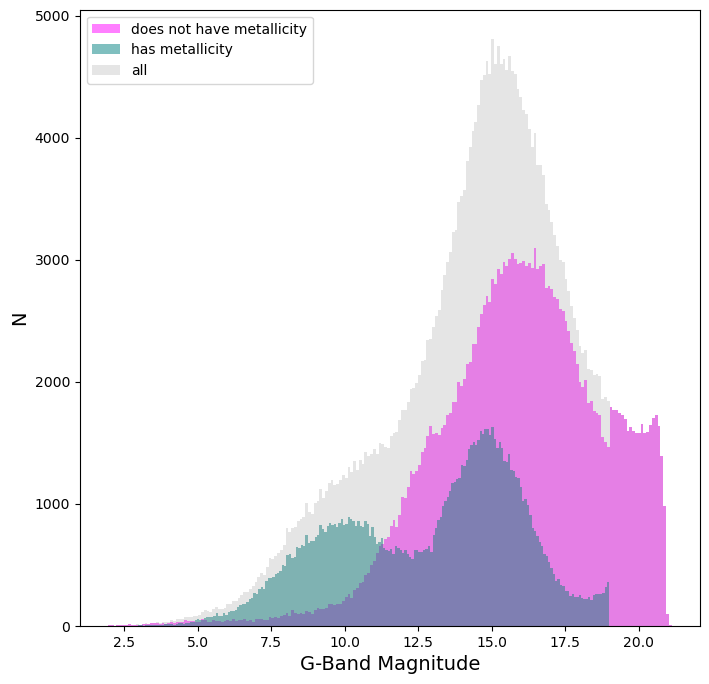

In [10]:
plt.figure(figsize=(8,8))
plt.xlabel("G-Band Magnitude", fontsize=14)
plt.ylabel("N",fontsize=14)
plt.hist(without_metal['phot_g_mean_mag'], color = "magenta", bins = 200, alpha = .5, label = "does not have metallicity")
plt.hist(with_metal['phot_g_mean_mag'], color = "teal", bins = 200, alpha = .5, label = "has metallicity")
plt.hist(data['phot_g_mean_mag'], color = "gray", bins = 200, alpha = .2, label = "all")
plt.legend()
plt.show()

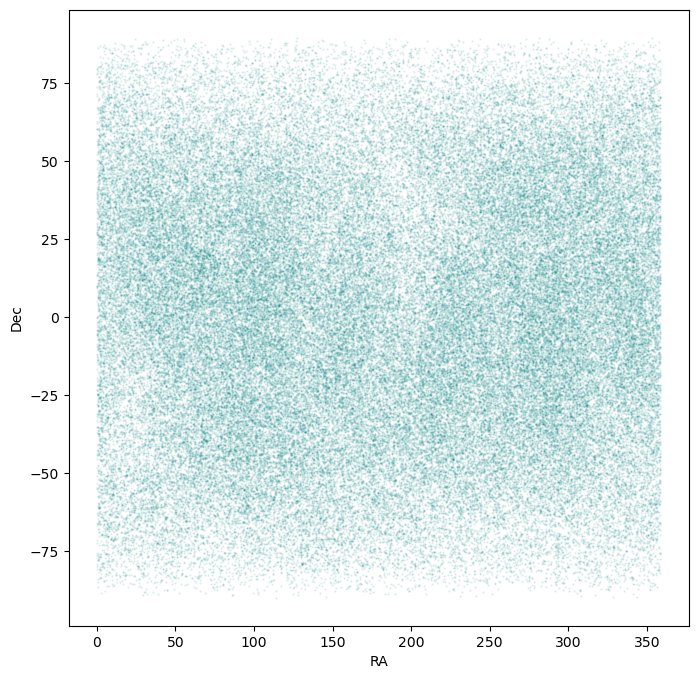

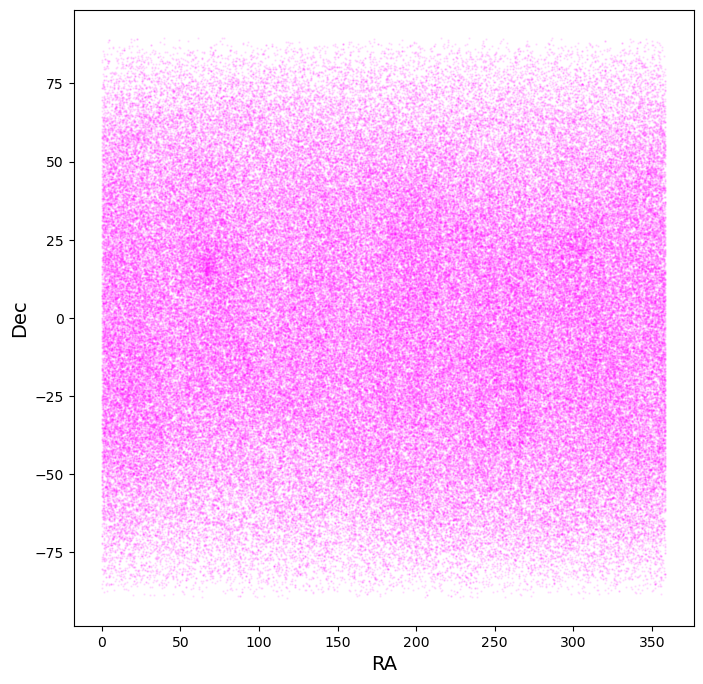

In [11]:
plt.figure(figsize=(8,8))
#plt.title("Has Metallicities")
plt.xlabel("RA")
plt.ylabel("Dec")
plt.scatter(with_metal['ra'], with_metal['dec'], color = "teal", alpha = .1, label = "has metallicity",s = .5)
plt.show()

plt.figure(figsize=(8,8))
#plt.title("Does Not Have Metallicities")
plt.xlabel("RA", fontsize = 14)
plt.ylabel("Dec", fontsize = 14)
plt.scatter(without_metal['ra'], without_metal['dec'], color = "magenta", alpha = .1, label = "does not have metallicity", s = .5)
plt.show()

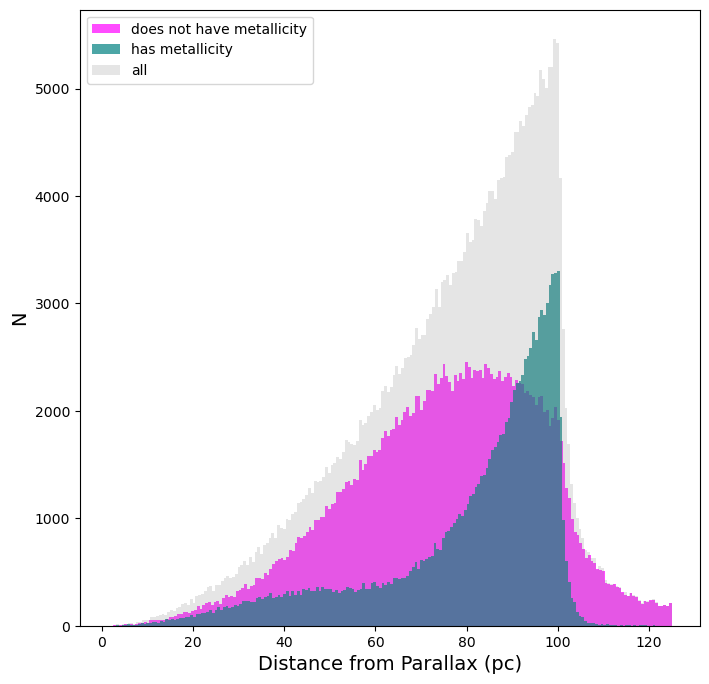

In [13]:
plt.figure(figsize=(8,8))
plt.xlabel("Distance from Parallax (pc)",fontsize = 14)
plt.ylabel("N",fontsize = 14)
#plt.xscale('log')
plt.hist(1/(without_metal['parallax'] * 0.001), color = "magenta", bins = 200, alpha = .7, label = "does not have metallicity")
plt.hist(1/(with_metal['parallax'] * 0.001), color = "teal", bins = 200, alpha = .7, label = "has metallicity")
plt.hist(1/(data['parallax'] * 0.001), color = "gray", bins = 200, alpha = .2, label = "all")
plt.legend()
plt.show()

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_21706/2129596605.py:10: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


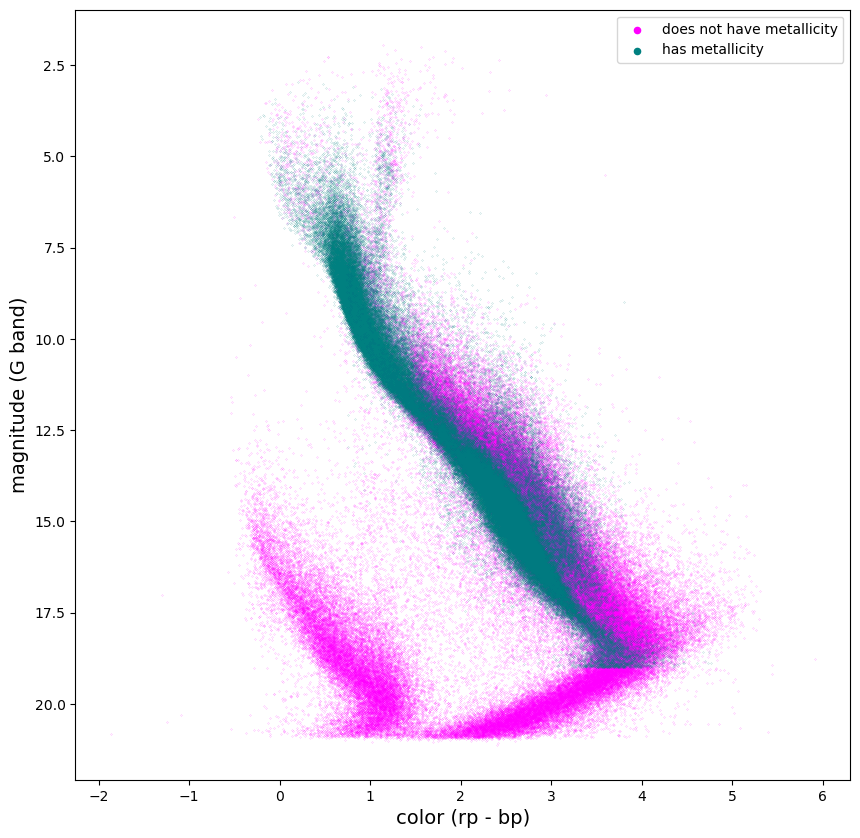

In [14]:
plt.figure(figsize=(10,10))
plt.xlabel("color (bp - rp)", fontsize = 14)
plt.ylabel("magnitude (G band)",fontsize = 14)
plt.gca().invert_yaxis()
plt.scatter(without_metal["phot_bp_mean_mag"] - without_metal["phot_rp_mean_mag"], \
        without_metal["phot_g_mean_mag"], color = 'magenta', label = "does not have metallicity", s=.01, alpha=1)
plt.scatter(with_metal["phot_bp_mean_mag"] - with_metal["phot_rp_mean_mag"], \
        with_metal["phot_g_mean_mag"], color = 'teal', label = "has metallicity", s=.01, alpha=1)
lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([20])
    handle.set_alpha(1)
    
plt.show()

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_21706/2870601939.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:
/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_21706/2870601939.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('maghist-hr.png')
/Users/autumn/opt/anaconda3/envs/gaia/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


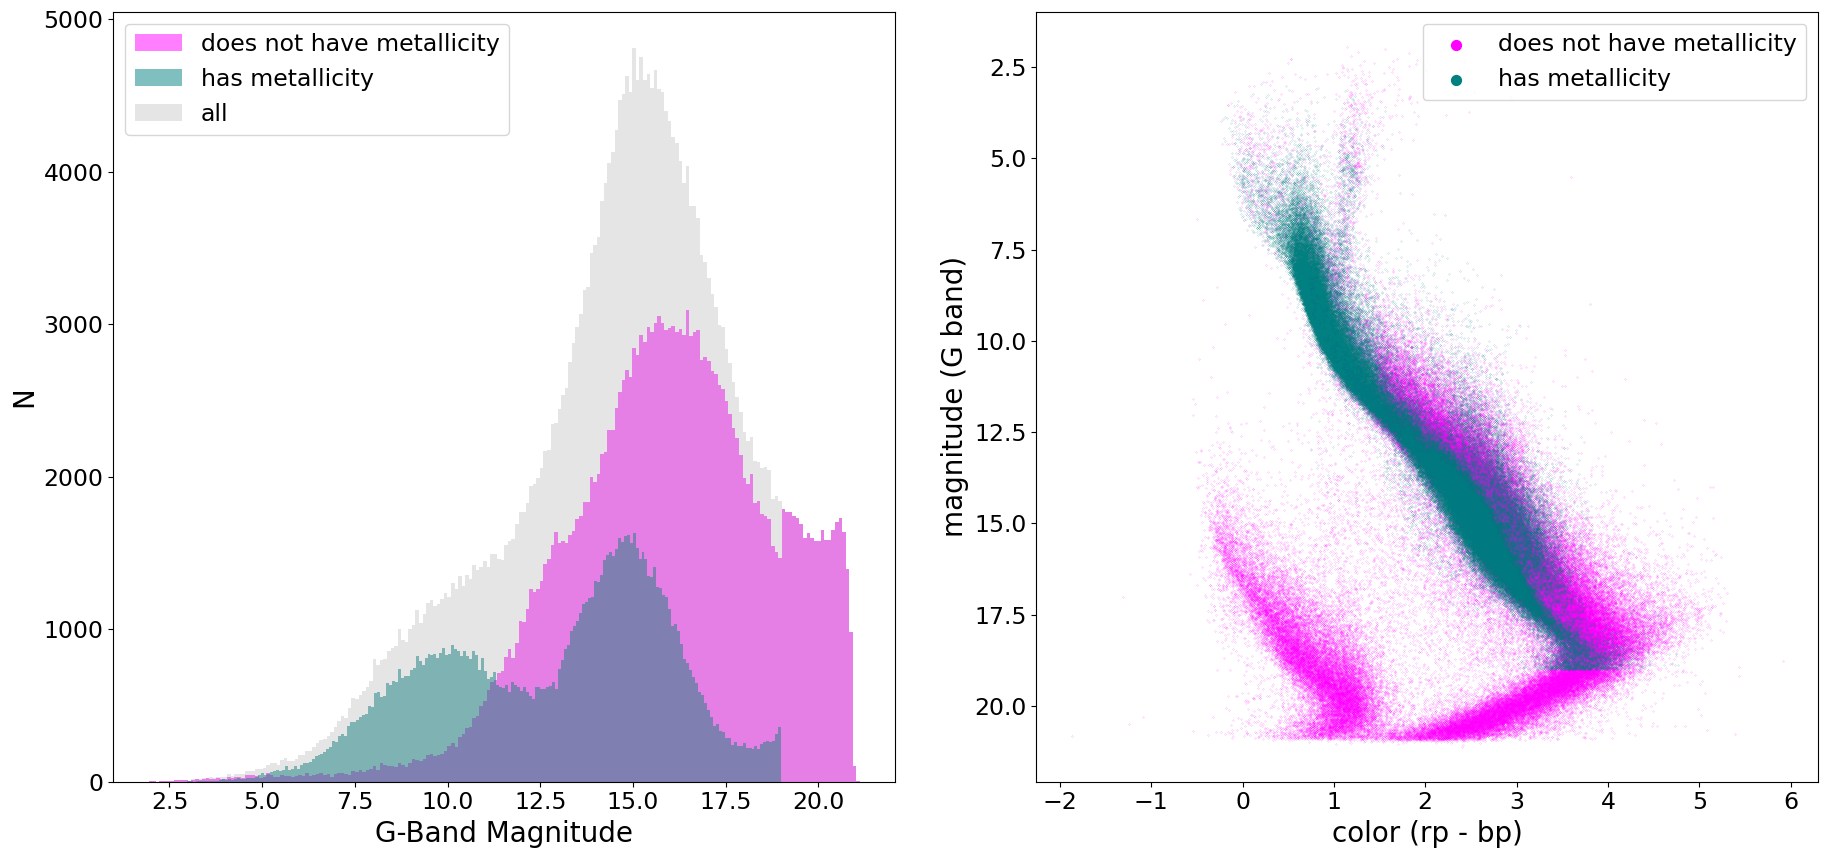

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
axs[0].set_xlabel("G-Band Magnitude", fontsize=20)
axs[0].set_ylabel("N",fontsize=20)
axs[0].hist(without_metal['phot_g_mean_mag'], color = "magenta", bins = 200, alpha = .5, label = "does not have metallicity")
axs[0].hist(with_metal['phot_g_mean_mag'], color = "teal", bins = 200, alpha = .5, label = "has metallicity")
axs[0].hist(data['phot_g_mean_mag'], color = "gray", bins = 200, alpha = .2, label = "all")
axs[0].tick_params(axis='both', labelsize=17)
axs[0].legend(fontsize = 17)

axs[1].set_xlabel("color (rp - bp)", fontsize = 20)
axs[1].set_ylabel("magnitude (G band)",fontsize = 20)
axs[1].invert_yaxis()
axs[1].scatter(without_metal["phot_bp_mean_mag"] - without_metal["phot_rp_mean_mag"], \
        without_metal["phot_g_mean_mag"], color = 'magenta', label = "does not have metallicity", s=.01, alpha=1)
axs[1].scatter(with_metal["phot_bp_mean_mag"] - with_metal["phot_rp_mean_mag"], \
        with_metal["phot_g_mean_mag"], color = 'teal', label = "has metallicity", s=.01, alpha=1)
axs[1].tick_params(axis='both', labelsize=17)
lgnd = axs[1].legend(fontsize = 17)
for handle in lgnd.legendHandles:
    handle.set_sizes([50])
    handle.set_alpha(1)
    

fig.subplots_adjust(wspace=.18)
plt.savefig('maghist-hr.png')
plt.show()

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_21706/2236651721.py:28: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


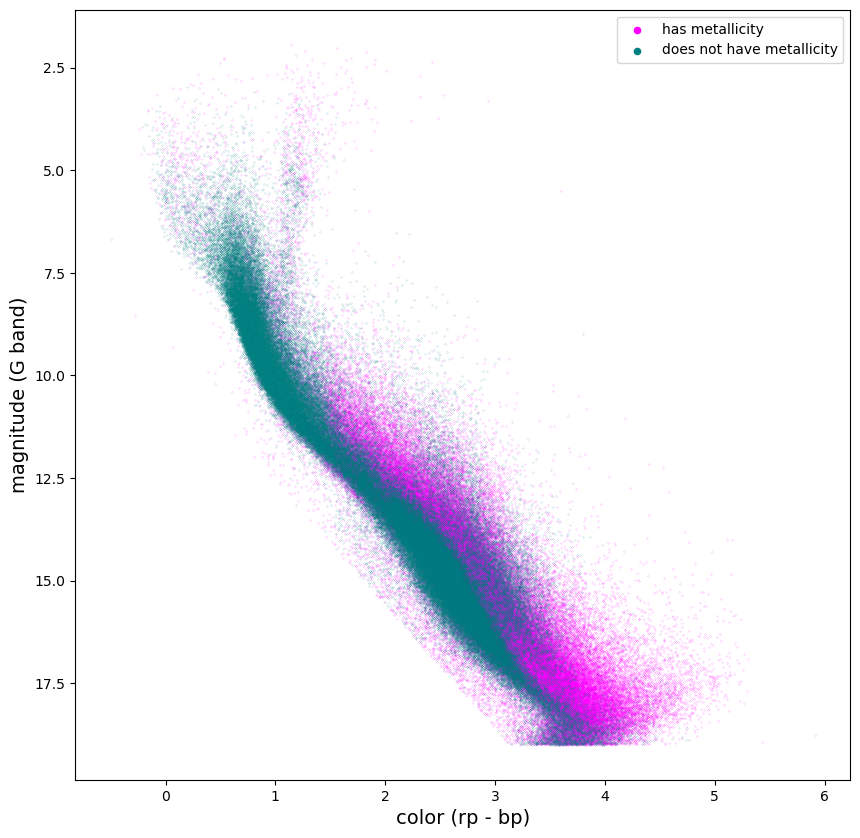

In [16]:
def main_seq_line(color):
    color = 3*color + 9.6
    return color

with_metal_color = with_metal["phot_bp_mean_mag"] - with_metal["phot_rp_mean_mag"]
without_metal_color = without_metal["phot_bp_mean_mag"] - without_metal["phot_rp_mean_mag"]

with_metal_indices = np.greater(main_seq_line(with_metal_color), with_metal["phot_g_mean_mag"])
without_metal_indices = np.greater(main_seq_line(without_metal_color), without_metal["phot_g_mean_mag"])
without_metal_indices = np.logical_and(without_metal_indices, np.less(without_metal["phot_g_mean_mag"],19))

plt.figure(figsize=(10,10))
plt.xlabel("color (rp - bp)", fontsize = 14)
plt.ylabel("magnitude (G band)",fontsize = 14)
plt.gca().invert_yaxis()

without_metal_main_color = without_metal_color[without_metal_indices]
without_metal_main_mag = without_metal["phot_g_mean_mag"][without_metal_indices]
with_metal_main_color = with_metal_color[with_metal_indices]
with_metal_main_mag = with_metal["phot_g_mean_mag"][with_metal_indices]

plt.scatter(without_metal_main_color,without_metal_main_mag,\
        color = 'magenta', label = "has metallicity", s=.01, alpha=1)
plt.scatter(with_metal_main_color,with_metal_main_mag,\
        color = 'teal', label = "does not have metallicity", s=.01, alpha=1)

lgnd = plt.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([20])
    handle.set_alpha(1)
plt.show()

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_21706/1754607136.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


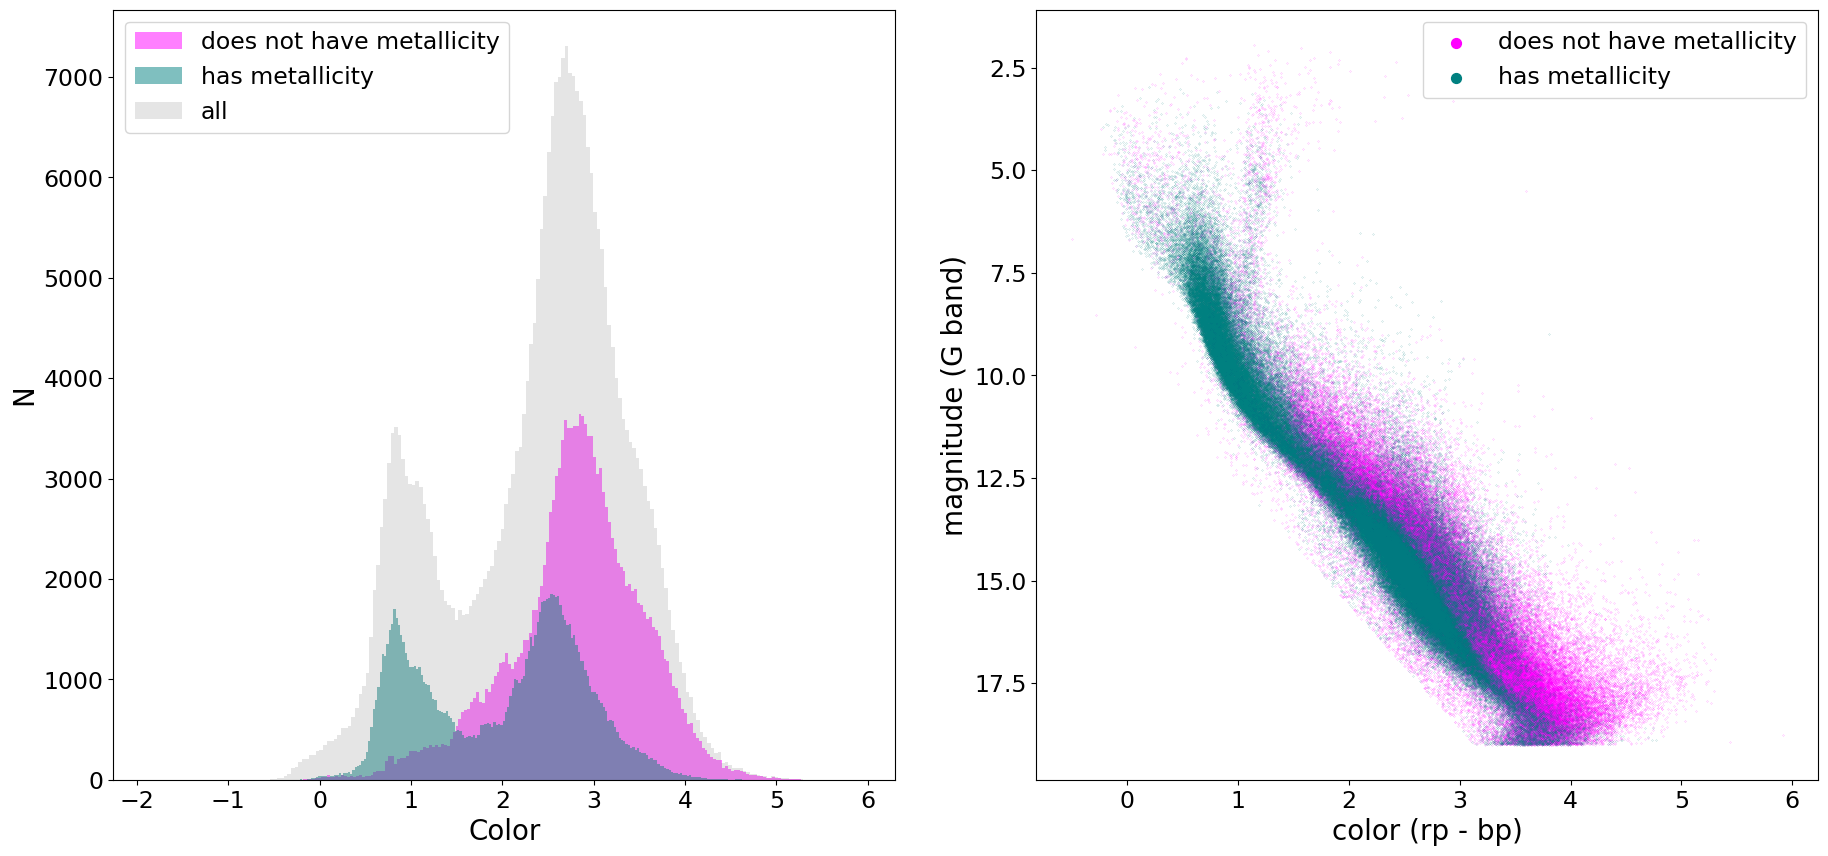

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(22, 10))
axs[0].set_xlabel("Color", fontsize=20)
axs[0].set_ylabel("N",fontsize=20)
axs[0].hist(without_metal_main_color, color = "magenta", bins = 200, alpha = .5, label = "does not have metallicity")
axs[0].hist(with_metal_main_color, color = "teal", bins = 200, alpha = .5, label = "has metallicity")
axs[0].hist(data["phot_bp_mean_mag"] - data["phot_rp_mean_mag"], color = "gray", bins = 200, alpha = .2, label = "all")
axs[0].tick_params(axis='both', labelsize=17)
axs[0].legend(fontsize = 17)

axs[1].set_xlabel("color (rp - bp)", fontsize = 20)
axs[1].set_ylabel("magnitude (G band)",fontsize = 20)
axs[1].invert_yaxis()
axs[1].scatter(without_metal_main_color,without_metal_main_mag,\
               color = 'magenta', label = "does not have metallicity", s=.01, alpha=1)
axs[1].scatter(with_metal_main_color, with_metal_main_mag,\
        color = 'teal', label = "has metallicity", s=.01, alpha=1)
axs[1].tick_params(axis='both', labelsize=17)
lgnd = axs[1].legend(fontsize = 17)
for handle in lgnd.legendHandles:
    handle.set_sizes([50])
    handle.set_alpha(1)
    

fig.subplots_adjust(wspace=.18)
plt.savefig('maghist-hr.png')
plt.show()

In [18]:
with_metal['mass_flame']

0        NaN
5        NaN
9        NaN
15       NaN
20       NaN
          ..
329974   NaN
329979   NaN
329987   NaN
329988   NaN
329995   NaN
Name: mass_flame, Length: 118146, dtype: float64

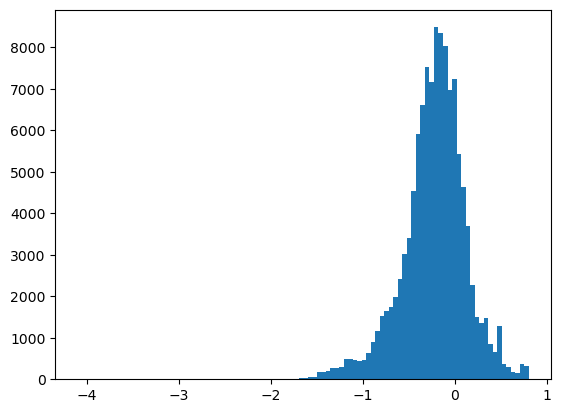

In [43]:
plt.hist(with_both['mh_gspphot'],bins=100)
plt.show()

In [55]:
metallicities = with_metal['mh_gspphot'].values
sorted_index_array_metal = np.argsort(metallicities)
top50metal_i = sorted_index_array_metal[-50:]
top50metal = metallicities[top50metal_i]

In [8]:
def get_ISO_mass(stars):
    "Given a dataframe of GAIA stars, output mass of ISOs produced by those stars"
    num_stars = stars.shape[0]
    ISO_properties = np.multiply(stars['mh_gspphot'], stars['mass_flame'])
    return np.sum(ISO_properties)